<a href="https://colab.research.google.com/github/nicolas-stelatto/bootcamp_data_science_aplicada/blob/main/Bootcamp_Data_Science_Aplicada_Alura_Modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caderno de exploração dos dados do datasus 2008 até mai/2021

## 01.Aquisição e leitura de dados reais

### 03 Produção hospitalar e Pandas

AS informações de onde conseguimos a base de dados para o trabalho estão no arquivo txt dentro do GitHub

In [ ]:
import pandas as pd

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv")

Se tentarmos abrir o arquivo assim, aparecerá um erro utf-8, que é muito comum quando vamos abrir arquivos do governo. Esse erro está associado à forma de abrir um arquivo.

Uma analogia é que o á é lido em português de uma forma, mas em outras línguas é lido de outra forma. Para isso, nós precisamos definir uma regra para o Python ler o arquivo. Para isso, precisamos definir um parâmetro dentro da nossa função que é encoding = "ISO-8859-1"

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1")

Agora se formos rodar esse arquivo, ele resultará o erro "Error Tokenising Data". Nesse caso, precisamos informar que é necessário pular as três primeiras linhas (porque não são relevantes) e também informar que o separador é o ";" e não p ","

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", engine="python")
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9222010,60","7493901,30","8148169,46","7353768,37","7739864,47","9246097,96","11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15788848,91","15784686,14","14388606,82","16063450,73","14939977,20","15107056,74","13534657,88","19698748,89","21129394,43","19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,0

No arquivo, ainda tem algumas linhas no final que não são relevantes para a nossa análise. O que precisamos fazer é excluir as doze últimas linhas

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, engine="python")
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9222010,60","7493901,30","8148169,46","7353768,37","7739864,47","9246097,96","11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15788848,91","15784686,14","14388606,82","16063450,73","14939977,20","15107056,74","13534657,88","19698748,89","21129394,43","19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,0

In [ ]:
dados.mean()

Series([], dtype: float64)

Vendo essa mensagem de erro, nós vemos que na verdade os valores são textos (Strings), e não números, porque, na língua portuguesa, nós identificamos separador de decimais com "," e o python por padrão utiliza ".". Dessa forma, o python entende que o valor é uma String, e não um número.

Para ajustar esse problema, precisamos informar no read csv outras informações - adicionar outros parâmetros

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.3

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

Não conseguimos analisar bem essas informações porque os dados estão em notação científica (forma de impressão está como notação científica). Para resolver o problema, basta alterar de forma global essa forma de impressão

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

Como podemos fazer para selecionar os valores da coluna 2008/jan?

### 04 Visualizações e gráficos

Retomando o questionamento do vídeo anterior: Como podemos fazer para selecionar os valores da coluna 2008/jan?

In [ ]:
dados["2008/Jan"]

0     1388528.39
1      902416.00
2     4735529.42
3      657889.53
4    18864744.11
5     1120973.34
6     3441592.69
7    10723506.39
8     7985142.43
9    15539821.90
10    5947814.08
11   10723002.45
12   14393949.89
13    6243726.32
14    2780750.11
15   21211522.47
16   45671659.76
17    5456723.98
18   23025258.52
19   91678473.48
20   38266347.46
21   16504913.45
22   30931325.46
23    5377392.11
24    4795299.01
25   15310637.29
26    4745919.19
Name: 2008/Jan, dtype: float64

Esses valores que aparecem de uma coluna apenas são chamados de SÉRIES. A forma de chamar uma coluna é a mesma forma de chamar o Value de um Dictionary (chamando o Key do Dictionary)

In [ ]:
dados["2008/Ago"].mean()

27800320.306666665

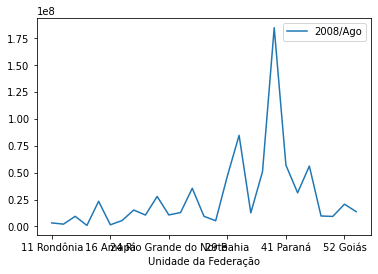

In [ ]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

Esse gráfico não está muito visível, porque as legendas não estão muito boas e, principalmente, porque, pelo tipo de dados que estamos lendo, o gráfico de linhas é ruim para visualização. É melhor plotar o gráfico de barras.

Para plotar o gráfico de barras podemos fazer da forma que está abaixo ou podemos fazer:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar")

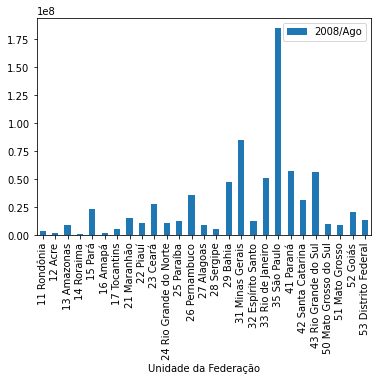

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago")

Nesse gráfico, podemos aumentar o tamanho da figura. Usamos o parâmatro Figsize para aumentar o tamanho colocando uma tupla de valores

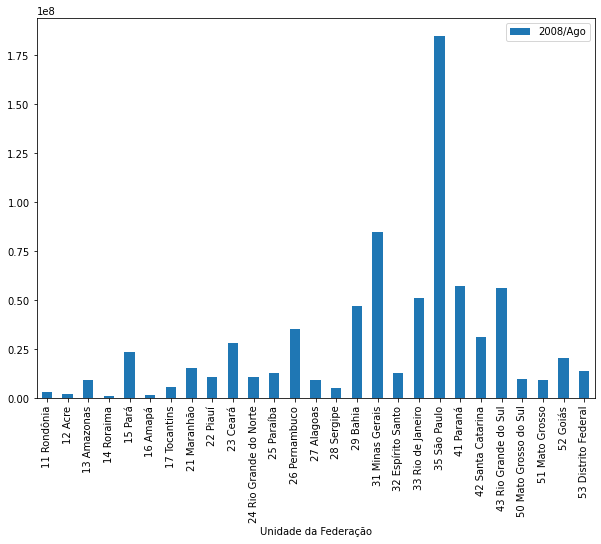

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))

Para arrumar esse problema, precisamos primeiramente usar a biblioteca matplotlib.pyplot usando a função import e importar a biblioteca matplotlib.ticker.FormatStrFormatter

#### Desafio 01: escolher um título mais descritivo, que passe a mensagem adequada.
obs: pensar no que você vai falar no gráfico. Porque se pensar "Valor por unidade da federação" não é um título que passa nenhuma mensagem, não agrega em nada. Na verdade era só ter lido os eixos que você já chegaria na conclusão do título

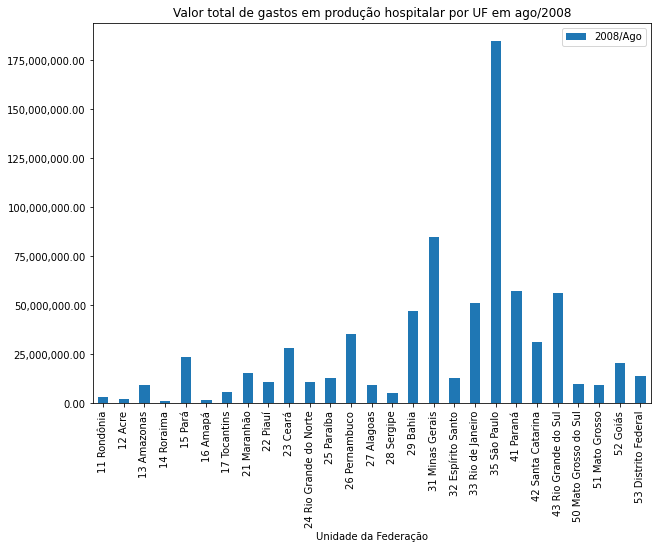

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))
#esse AX também é a mesma coisa que AXIS, que são os controles dos eixos X e eixos Y de um gráfico

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#buscar na documentação essa função e colocar o "," para separação de milhares e "." para separação de decimais com duas casas

plt.title("Valor total de gastos em produção hospitalar por UF em ago/2008")
#função para colocar o título em um gráfico

plt.show()
#método para excluir algumas informações de detalhes que apareceria antes do gráfico

No caso do título, precisaríamos informar quais são os valores que estão sendo exibiso (valor total de gastos em produção hospitalar) separado por UF da série histórica de agosto de 2008

#### Desafio 02: Faça a mesma análise para o mês mais recente

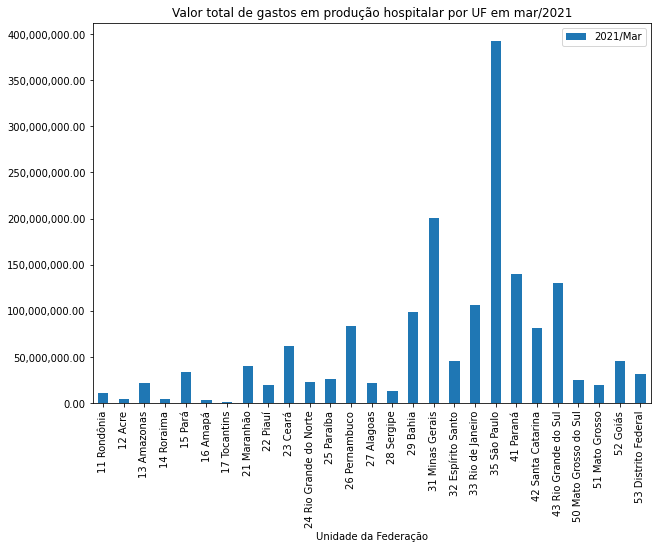

In [ ]:
ax = dados.plot.bar(x="Unidade da Federação", y="2021/Mar", figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor total de gastos em produção hospitalar por UF em mar/2021")
plt.show()